In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import glaft
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('../manifest.csv', dtype=str)
in_shp = '../../data/shapefiles/bedrock_V1.shp'
selected_cases = df.loc[[136, 140, 144]]
selected_cases

,Date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,Software,Vx,Vy
136,LS8-20180802-20180818,16,32,480,4,60,None,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...
140,LS8-20180802-20180818,16,32,480,4,60,Gau,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...
144,LS8-20180802-20180818,16,32,480,4,60,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...


In [5]:
exps = {}

for idx, row in selected_cases.iterrows():
    exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, static_area=in_shp, kde_gridsize=60, thres_sigma=2.0)
    exp.static_terrain_analysis()
    exps[idx] = exp

Running clip_static_area
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain
Running clip_static_area
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain
Running clip_static_area
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain


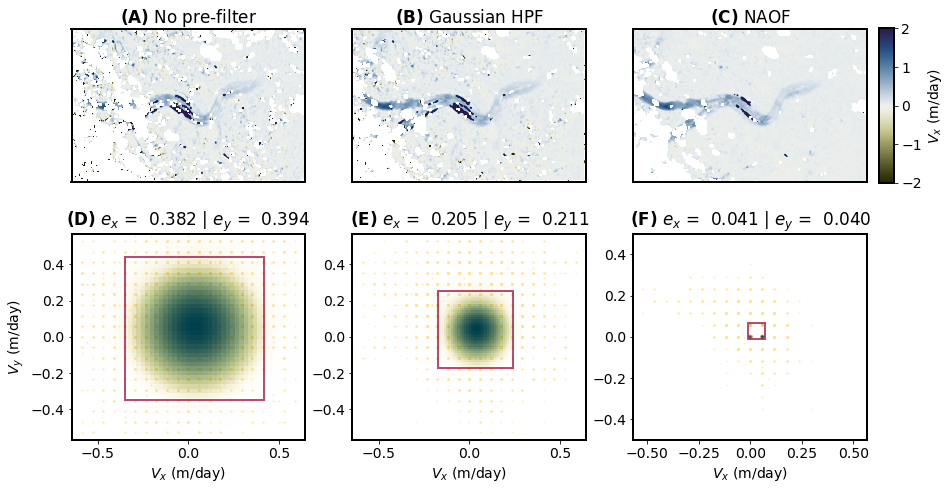

In [20]:
font = {'size'   : 14}
mpl.rc('font', **font)
axes_settings = {'linewidth'   : 2}
# axes_settings = {'linewidth'   : 2, 'labelsize': 14}
mpl.rc('axes', **axes_settings)

fig, axs = plt.subplots(2, 3, figsize=(13, 6.7), constrained_layout=True)

for idx, n, label, label2 in zip([136, 140, 144], 
                                 [0, 1, 2], 
                                 ['$\\bf{(A)}$ No pre-filter', '$\\bf{(B)}$ Gaussian HPF', '$\\bf{(C)}$ NAOF'], 
                                 ['$\\bf{(D)}$ ', '$\\bf{(E)}$ ', '$\\bf{(F)}$ ']):
    exp = exps[idx]
    ax_sel = axs[0, n]
    cm_settings = glaft.show_velocomp(exp.vxfile, ax=ax_sel)
    ax_sel.set_title(label)
    ax_sel = axs[1, n]
    exp.plot_zoomed_extent(ax=ax_sel)
    ax_sel.axis('equal')
    ax_sel.set_xlim(-0.5, 0.5)
    ax_sel.set_ylim(-0.5, 0.5)
    ax_sel.set_xlabel('$V_x$ ({})'.format(exp.velocity_unit))
    metric_text = ax_sel.get_title()
    ax_sel.set_title(label2 + metric_text[:-8])

    
mappable = glaft.prep_colorbar_mappable(**cm_settings)
fig.colorbar(mappable, ax=[axs[0, 2]], location='right', shrink=0.75, aspect=10, label='$V_x$ ({})'.format(exp.velocity_unit))
axs[1, 0].set_ylabel('$V_y$ ({})'.format(exp.velocity_unit))

fig.patch.set_facecolor('xkcd:white')
fig.savefig('Fig2.png', dpi=300)
# fig.savefig('Fig2.pdf')